#Step 3
Optimization with uncertain conversion rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 [0, 2, 0, 2, 0] 1053.470556 10.534705559999999 dict_values([805.1554590000001, 744.0017541, 714.6353878, 661.0592985, 808.22013075, 747.6714085499999, 718.5939489, 665.57846025, 820.048761, 759.7197324, 730.7453272, 677.9687399999999, 818.1489987500001, 758.1500607500001, 729.3339085, 676.85142125, 779.751425, 719.0021255, 689.829573, 636.6150755000001, 782.5692562500001, 722.40057525, 693.5057714999999, 640.82023275, 793.4755250000001, 733.538012, 704.7525119999999, 652.3018819999999, 791.7186562500001, 732.0911662499999, 703.4543975, 651.27810375, 767.08885, 706.45127435, 677.3282921, 624.2891983499999, 769.6823368749999, 709.608792175, 680.75603305, 628.2230094249999, 779.8772274999999, 720.0442993999999, 691.3059523999999, 639.0052644, 778.207921875, 718.6708088749999, 690.07447325, 638.033720125, 706.9543570000001, 647.8516724, 619.4898440000001, 567.3377376000001, 709.6148035, 651.0470407, 622.941649, 571.2664633, 719.243968, 660.9

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


UCB

In [5]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
[2, 2, 2, 3, 2]
[3, 2, 3, 3, 1]
[2, 2, 1, 3, 0]
[1, 3, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 2, 3, 1]
[2, 2, 1, 2, 2]
[1, 2, 3, 2, 0]
[3, 2, 2, 2, 3]
loading: [=                             ] 3.3%[2, 2, 1, 2, 0]
[0, 3, 0, 2, 1]
[0, 1, 2, 2, 2]
[3, 1, 0, 2, 0]
[0, 2, 0, 2, 0]
[3, 2, 0, 3, 0]
[1, 2, 0, 2, 0]
[2, 2, 0, 3, 2]
[0, 2, 1, 3, 1]
[3, 1, 2, 3, 0]
loading: [==                            ] 6.7%[2, 2, 0, 3, 0]
[2, 1, 1, 2, 3]
[1, 2, 1, 3, 1]
[3, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[2, 2, 0, 3, 0]
[3, 2, 1, 2, 0]
[2, 2, 1, 3, 0]
[0, 2, 1, 3, 0]
[3, 1, 3, 3, 0]
loading: [===                           ] 10.0%[1, 2, 0, 3, 2]
[0, 2, 0, 2, 1]
[2, 2, 0, 2, 0]
[3, 2, 0, 2, 0]
[0, 1, 2, 3, 1]
[0, 2, 1, 3, 0]
[0, 3, 0, 2, 0]
[2, 2, 0, 3, 0]
[0, 2, 0, 3, 3]
[3, 1, 1, 3, 0]
loading: [====                          ] 13.3%[1, 2, 0, 2, 2]
[0, 2, 1, 3, 1]
[3, 2, 0, 3, 0]
[0, 2, 1, 2, 0]
[2, 2, 0, 3, 0]
[1, 2, 0, 1, 0]
[0, 2, 0, 1, 0]
[0

[3, 2, 0, 2, 0]
[0, 2, 1, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 1, 0]
[0, 1, 3, 3, 0]
[2, 2, 0, 2, 0]
loading: [==========                    ] 33.3%[0, 2, 0, 2, 0]
[3, 1, 2, 2, 0]
[0, 2, 1, 2, 0]
[0, 2, 0, 3, 2]
[2, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 2, 2, 0]
[1, 1, 2, 2, 0]
[0, 2, 2, 3, 0]
loading: [===========                   ] 36.7%[0, 2, 2, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 2, 3, 0]
[3, 2, 0, 3, 0]
[0, 2, 1, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 3]
[0, 2, 0, 3, 0]
[2, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
loading: [============                  ] 40.0%[0, 2, 0, 3, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 1, 1]
[0, 1, 2, 2, 1]
[3, 1, 2, 2, 0]
[0, 3, 0, 3, 0]
[0, 2, 0, 3, 1]
loading: [=============                 ] 43.3%[0, 2, 1, 2, 0]
[0, 2, 1, 1, 0]
[2, 2, 0, 2, 0]
[1, 2, 0, 3, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 3, 0]
[2, 2, 0, 2, 0]
[0, 1, 3, 2, 0]
[3, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
loading: [==============                ] 46.7%[0, 2, 0, 3, 0]
[0, 2, 0, 3, 

loading: [===================           ] 63.3%[0, 2, 0, 2, 1]
[0, 2, 0, 3, 0]
[0, 1, 3, 2, 0]
[3, 1, 2, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 1]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
loading: [====================          ] 66.7%[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[2, 2, 0, 1, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
loading: [=====================         ] 70.0%[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 1, 2]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 1]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
loading: [======================        ] 73.3%[0, 2, 0, 2, 0]
[2, 2, 0, 2, 0]
[0, 2, 0, 3, 2]
[0, 2, 1, 2, 0]
[0, 2, 1, 1, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 3]
[0, 2, 0, 3, 0]
loading: [=======================       ] 76.7%[3, 1, 2, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 

(3, 300)

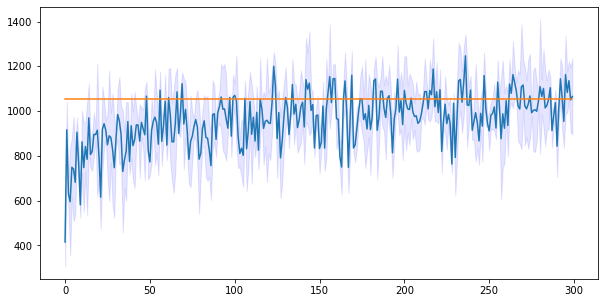

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

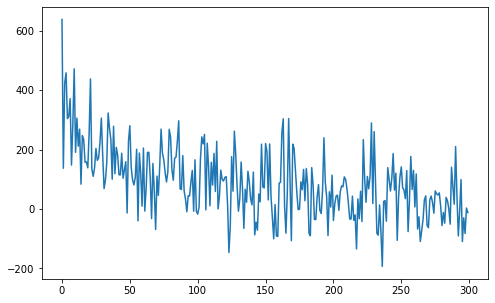

In [7]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.show()

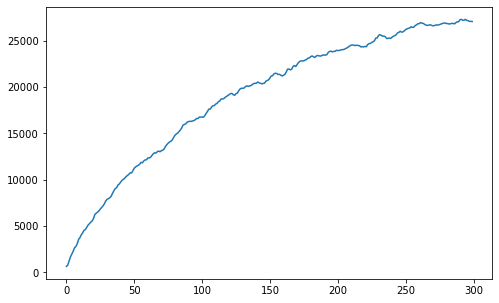

In [8]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.show()

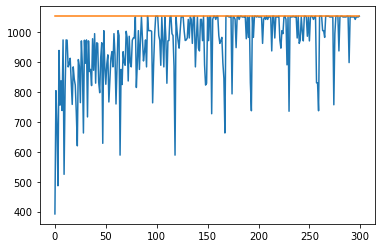

In [9]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [10]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%[3, 2, 0, 3, 3]
[2, 2, 2, 3, 2]
[0, 2, 1, 3, 0]
[1, 3, 3, 3, 1]
[0, 2, 3, 2, 0]
[0, 2, 0, 1, 0]
[0, 1, 1, 1, 0]
[0, 2, 0, 1, 0]
[0, 2, 2, 2, 0]
[0, 2, 2, 1, 0]
loading: [=                             ] 3.3%[3, 2, 1, 1, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 1, 0]
[0, 2, 1, 1, 1]
[0, 2, 0, 1, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 1, 0]
[0, 1, 0, 1, 0]
loading: [==                            ] 6.7%[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 1]
loading: [===                           ] 10.0%[0, 1, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 1, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 2]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
loading: [====                          ] 13.3%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 1, 0, 3, 1]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[

[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
loading: [==========                    ] 33.3%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 1, 0]
[0, 2, 0, 2, 0]
loading: [===========                   ] 36.7%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[3, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
loading: [============                  ] 40.0%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
loading: [=============                 ] 43.3%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[1, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
loading: [==============                ] 46.7%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 

loading: [===================           ] 63.3%[0, 2, 0, 2, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 0, 0]
loading: [====================          ] 66.7%[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
loading: [=====================         ] 70.0%[0, 2, 0, 0, 0]
[0, 2, 0, 2, 0]
[0, 2, 1, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
loading: [======================        ] 73.3%[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 0]
[0, 1, 1, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[2, 2, 1, 2, 0]
[0, 2, 0, 1, 0]
loading: [=======================       ] 76.7%[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 2, 0]
[0, 2, 0, 2, 

(3, 300)

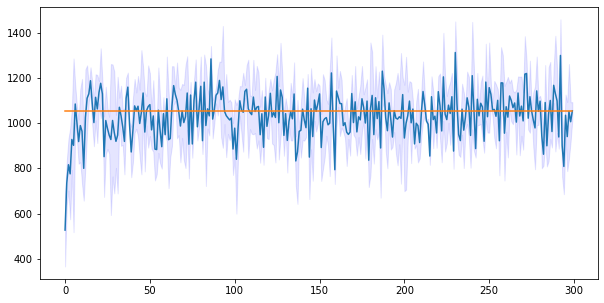

In [11]:
plt.figure(figsize=(10, 5))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

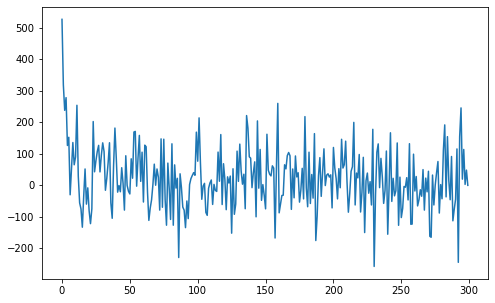

In [12]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.show()

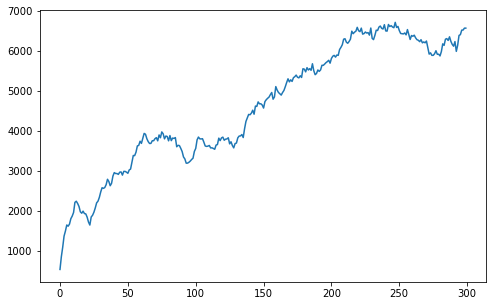

In [13]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.show()

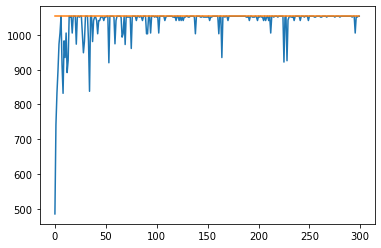

In [14]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [15]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = th_rews[-1] - th_rews[-2]
print(delta_arms)
print(ts_learner.t)
seen = sum(sum(sum(ts_learner.beta_parameters)))
print(np.log(seen))
theoretical_regret = 1024 * np.log(seen)/delta_arms
theoretical_regret

2.4055510000000595
300
10.706945476135939


4557.7550289155915